<a href="https://colab.research.google.com/github/Its-mit/Chronic_Disease_Prediction_AI/blob/main/Chronic_Disease_AI_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# If from Kaggle
!pip install kaggle
from google.colab import files
files.upload()  # Upload your kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 22.2MB/s]
Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: diabetes.csv            


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes.csv")

# Preview the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

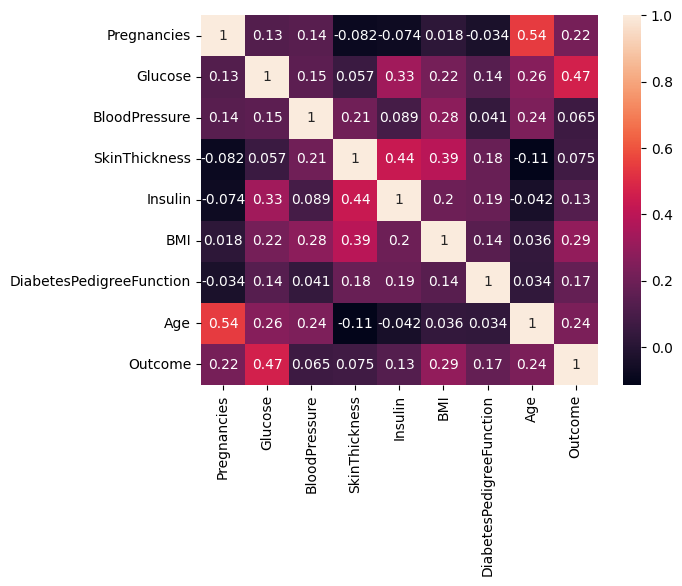

In [ ]:
df.info()
df.describe()
df.isnull().sum()
sns.heatmap(df.corr(), annot=True)


In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Keep column names in scaled version
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y, test_size=0.2, random_state=42)



In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[78 21]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



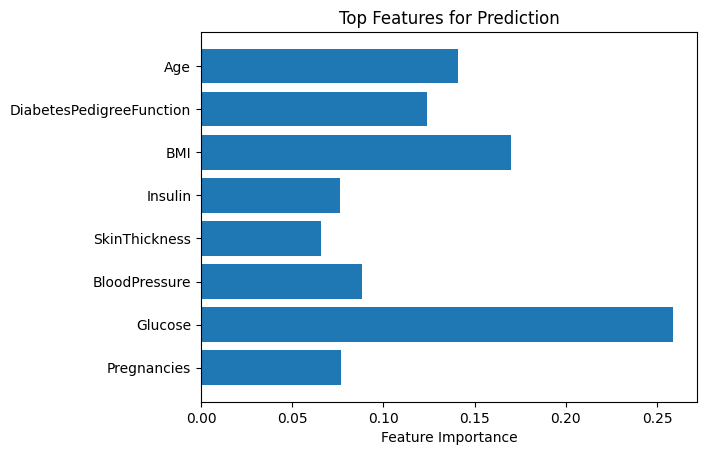

In [ ]:
importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Top Features for Prediction")
plt.show()


 95%|=================== | 1161/1228 [00:17<00:00]       

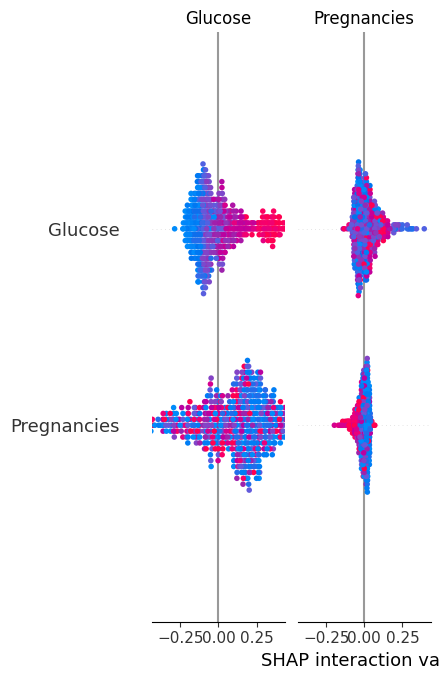

In [ ]:
!pip install shap
import shap

# Modern explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values (disable additivity check)
shap_values = explainer(X_train, check_additivity=False)

# Plot summary
shap.summary_plot(shap_values, X_train)




In [ ]:
def health_recommendation(pred):
    if pred == 1:
        return "⚠️ Risk Detected: Maintain healthy diet, exercise regularly, consult a doctor."
    else:
        return "✅ Low risk. Continue healthy lifestyle."

# Try on one test sample
sample = X_test.iloc[0].values.reshape(1, -1)
pred = model.predict(sample)[0]
print(health_recommendation(pred))


✅ Low risk. Continue healthy lifestyle.


In [1]:
!pip install gradio

import gradio as gr

def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                     BMI, DiabetesPedigreeFunction, Age):
    data = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
             BMI, DiabetesPedigreeFunction, Age]]
    scaled = scaler.transform(data)
    pred = model.predict(scaled)[0]
    advice = health_recommendation(pred)
    return advice

inputs = [
    gr.Number(label="Pregnancies"),
    gr.Number(label="Glucose"),
    gr.Number(label="Blood Pressure"),
    gr.Number(label="Skin Thickness"),
    gr.Number(label="Insulin"),
    gr.Number(label="BMI"),
    gr.Number(label="Diabetes Pedigree Function"),
    gr.Number(label="Age")
]

gr.Interface(fn=predict_diabetes, inputs=inputs, outputs="text",
             title="Chronic Disease Prediction AI").launch()



It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ace0911635e51ddf9d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import joblib
joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']